# Lab 6

## Exercise 5.12: The Stefan-Boltzmann Constant

Part a)

\begin{equation*}
I(\omega) = \frac{\hbar}{4\pi^2c^2} \frac{\omega}{e^k{\frac{\hbar\omega}{k_BT}}}
\end{equation*}

\begin{equation*}
W =\int_{0}^{\infty} \frac{\hbar}{4\pi^2c^2} \frac{\omega}{e^k{\frac{\hbar\omega}{k_BT}}}d\omega
\end{equation*}

\begin{equation*}
x = \frac{\hbar\omega}{k_BT}
\end{equation*}

\begin{equation*}
dx = \frac{\hbar d\omega}{k_BT} \space \space d\omega = \frac{k_BTdx}{\hbar}
\end{equation*}

\begin{equation*}
W =\int_{0}^{\infty} \frac{\hbar}{4\pi^2c^2} \frac{(\frac{xk_bT}{\hbar})^3}{e^x}\frac{k_BT}{\hbar}dx
\end{equation*}

\begin{equation*}
W =\frac{k_b^4T^4}{4\pi^2c^2\hbar^3}\int_{0}^{\infty}\frac{x^3}{e^x}dx
\end{equation*}


Part b)

In [2]:
%matplotlib inline
from scipy import integrate
import math
import cmath
import numpy as np
import pylab as plt

In [63]:
kB = 1.38064852 * 10**-23 # Units: m^2 kg s^-2 K^-1
T = 5800 # Units: K
c = 3 * 10**8 # Units: m/s
hBar = 1.054571800 * 10**-34 # Units: J*s
a = 0
b = np.inf

def integrand (x):
    """Returns the integrand that is to be integrated
    
    Arguements: x - (hbar*omega)/(kB*T)
    
    Returned: x^3/e^x"""
    
    # This order of operations was necessary to avoid overflowing
    return (math.exp(-x) * x*x*x) / (1 - math.exp(-x)) 

# Uses the quad function to calculate integral and error
integral, error = integrate.quad(integrand, a, b)

W = ((kB**4 * T**4) / (4 * math.pi**2 * c**2 * hBar**3)) * integral
WErr = ((kB**4 * T**4) / (4 * math.pi**2 * c**2 * hBar**3)) * error

print("W = ", W)
print("Error = ", WErr)

W =  64079929.48307855
Error =  0.025936838918349095


Part c)

In [14]:
rho = W / T**4
rhoAccepted = 5.67 * 10**-8 # W/m^2K^-4

# Compares the caluclated value to the actual value
print("Calculated value: ", rho)
print("Actual value: ", rhoAccepted)

Calculated value:  5.662523937010056e-08
Actual value:  5.67e-08


## Exercise 5.19: Diffraction Gratings

Part a)

\begin{equation*}
u_z = \frac{n\pi}{\alpha}
\end{equation*}

This is because $sin^2(\alpha u)$ = 0 whenever u is a multiple of $\pi$.

Part b)

In [5]:
alpha = math.pi / 20e-6 # Units: meters^-1

def q (u):
    """Returns the transmission function of the light
    
    Arguements: u - the distnance on the grating from the central axis
    
    Returned: sin^2(alpha * u)"""

    return (math.sin(alpha * u))**2

Part c)

In [6]:
lmda = 500e-9 #Light wavelength, Units: m
f = 1 # Focal length of lens, Units: m
wScreen = 0.1 # Width of the screen, Units: m
wGrating = 200e-6 # Seperation between slits, Units: m
N = 1000
   
def I1 (transmissionFunction, x):
    """Returns the intensity of the light at a position on the screen
    
    Arguements: transmissionFunction - the transmission function of the light
                x - the position along the screen
    
    Returned: The intensity of the light at x"""
    
    def integrand2 (u1):
        """Returns the integrand used to calcualte intensity
        
        Arguements: u1 - the distance on the grating from the central axis
        
        Returned: the integrand used to calcualte intensity"""
        
        return math.sqrt(transmissionFunction(u1)) * cmath.exp((1j * 2 * math.pi * x * u1) / (lmda * f))
    
    def simpson (func, numSteps, x1, x2):
        """Integrates using Simpson's rule
        
        Arguements: func - the function to be integrated
                    numSteps - the number of steps used for integration
                    x1 - the lower bound
                    x2 - the upper bound
                    
        Returned: The integral of func"""
        
        h = (x2 - x1) / numSteps
        sum = func (x1) + func (x2)

        for i in range (int (numSteps / 2)):
            sum += 4 * func (x1 + (2 * i - 1) * h) #odd terms
            sum += 2 * func (x1 + 2 * i * h) #even terms
            
        return sum * h / 3

    integral = simpson(integrand2, N, -wGrating/2, wGrating/2)
    intensity = abs(integral)**2
    
    return intensity

Part d)

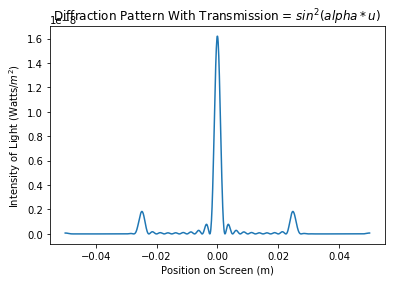

In [9]:
steps = 1000
xValues = np.linspace (-0.05, 0.05, steps)
brightness = []

# Calculates the intensity of light along the screen
for i in xValues:
    brightness.append(I1 (q, i))

plt.plot(xValues, brightness)
plt.title("Diffraction Pattern With Transmission = $sin^2(alpha * u)$")
plt.xlabel("Position on Screen (m)")
plt.ylabel("Intensity of Light (Watts/$m^2$)")
plt.show()

This plot shows the intensity of light along the length of the screen. The light ($\lambda = 500nm$) is incident on a diffraction grating with slits separated by $20 \mu m$, and then a lens with a focal length of 1 meter. The transmission pattern function is $q(u) = sin^2(\alpha u)$ where $\alpha = 20\mu m$. The plot is a representation of the diffraction pattern on the screen. This pattern makes sense, because it peaks in the middle, and it is symmetrical. This is consistent with what we see from experimental trials of light interference.

Part e)

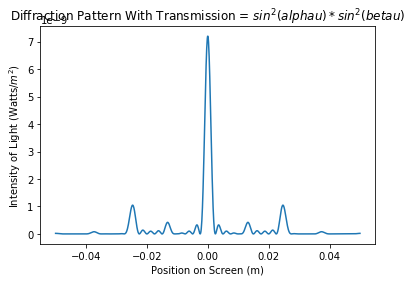

In [10]:
alpha = math.pi / 20e-6 # Units: meters^-1
beta = alpha / 2

def q2(u):
    """Returns the new transmission function of the light
    
    Arguements: u - the distnance on the grating from the central axis
    
    Returned: sin^2(alpha * u) * cos^2(beta * u)"""
    
    return (math.sin(alpha * u))**2 * (math.sin(beta * u))**2

brightness = []

# Calculates the intensity of light along the screen with the new function
for i in xValues:
    brightness.append(I1 (q2, i))

plt.plot(xValues, brightness)
plt.title("Diffraction Pattern With Transmission = $sin^2(alpha u) * sin^2(beta u)$")
plt.xlabel("Position on Screen (m)")
plt.ylabel("Intensity of Light (Watts/$m^2$)")
plt.show()

This plot shows the diffraction pattern on a screen, with all the same parameters as the plot above, except for the transmission pattern. The transmission pattern for this plot is $q(u) = sin^2(\alpha u)sin^2(\beta u)$. The resulting pattern that we see on the plot makes sense, because it is also symmetrical, but there are more peaks, and this is expected, because there is now more than one factor in the transmission equation.